<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/ZooClassification/animalsort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential as seq
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split as tts
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score as acc
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns
from google.colab import files 

In [3]:
files.upload()

Saving zoo.csv to zoo.csv


{'zoo.csv': b'animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type\r\naardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1\r\nantelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1\r\nbass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4\r\nbear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1\r\nboar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1\r\nbuffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1\r\ncalf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1\r\ncarp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4\r\ncatfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4\r\ncavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1\r\ncheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1\r\nchicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2\r\nchub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4\r\nclam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7\r\ncrab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7\r\ncrayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7\r\ncrow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2\r\ndeer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1\r\ndogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4\r\ndolphin,0,0,0,1,0,

In [5]:
data = pd.read_csv('zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


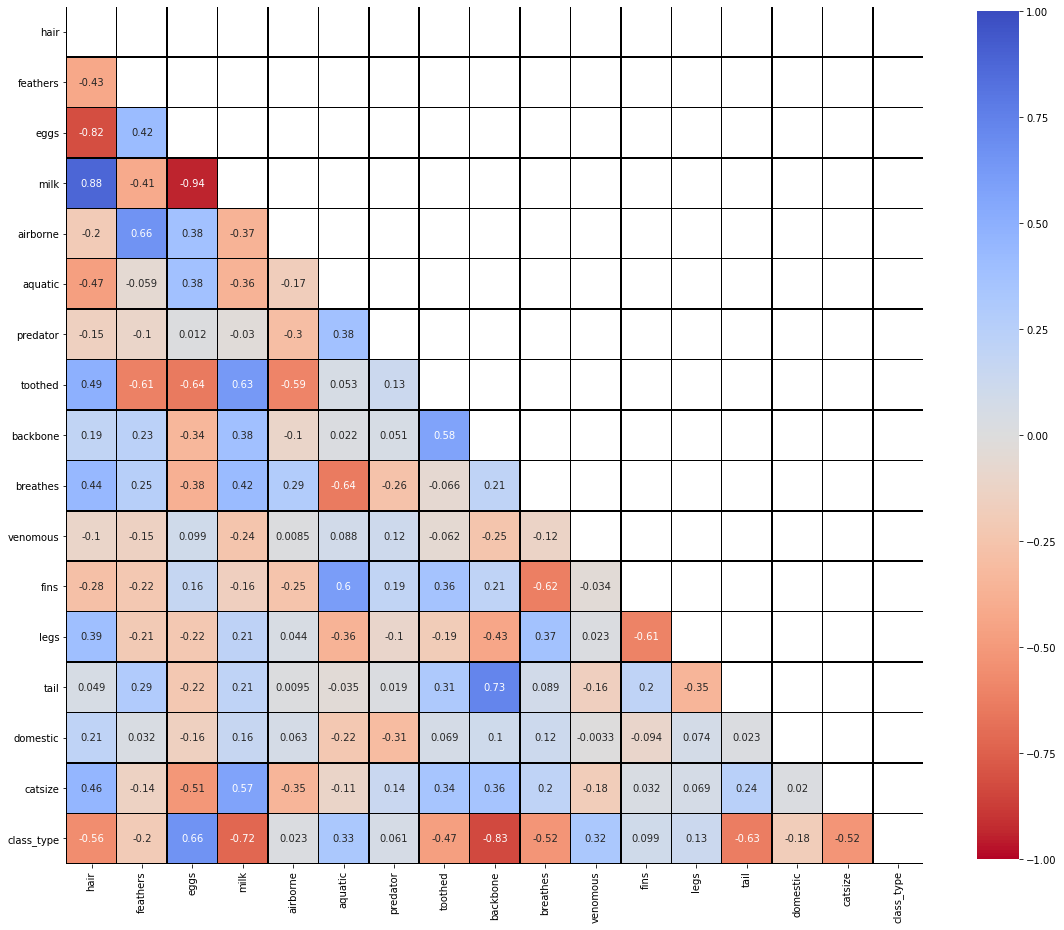

In [9]:
#visualize
corr = data.corr(method='pearson')
fig = plt.figure(figsize=(16,16))
plot = fig.add_subplot(1,1,1)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cm.coolwarm_r,
            linewidths=0.5, linecolor='black',
            square=True, mask = mask, 
            cbar_kws={"shrink": .75})
plt.tight_layout()

In [10]:
Y = data['class_type']
data = data.drop(columns=['class_type', 'animal_name'], axis=1)

In [11]:
trainX,testX,trainY,testY = tts(data,Y,test_size=0.1,random_state=42)

In [12]:
#create diff models
def models(trainX, trainY):
  #Logistic Regression
  lr = LR(random_state = 42)
  lr.fit(trainX, trainY)
  #Decision Tree
  dtc = DTC(criterion='entropy', random_state = 42)
  dtc.fit(trainX, trainY)
  #Random Forest Classifier
  rfc = RFC(n_estimators = 10, criterion = 'entropy', random_state = 42)
  rfc.fit(trainX, trainY)
  #K Neighbors Classifier
  knc=KNC(n_neighbors=8)
  knc.fit(trainX,trainY)
  #Support Vector Machine
  svc = SVC()
  svc.fit(trainX,trainY)
  #print
  print('Logistic Regression Training Accuracy: ', lr.score(trainX,trainY) * 100, '%')
  print('Decision Tree Classifier Accuracy: ', dtc.score(trainX,trainY)*100, '%')
  print('Random Forest Classifier Accuracy: ', rfc.score(trainX,trainY)*100, '%') 
  print('K-Neighbors Classifier Accuracy: ', knc.score(trainX,trainY)*100, '%')
  print('Support Vector Classifier Accuracy: ', svc.score(trainX,trainY)*100, '%') 
  #return
  return lr, dtc, rfc, knc, svc

In [14]:
arch = models(trainX,trainY)


Logistic Regression Training Accuracy:  98.88888888888889 %
Decision Tree Classifier Accuracy:  100.0 %
Random Forest Classifier Accuracy:  100.0 %
K-Neighbors Classifier Accuracy:  86.66666666666667 %
Support Vector Classifier Accuracy:  96.66666666666667 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Neighbors Classifier', 'Support Vector Classifier']
for i in range(len(arch)):
  accuracy = acc(testY, arch[i].predict(testX))
  print(names[i], 'Accuracy: ', accuracy * 100, '%')
  print()

Logistic Regression Accuracy:  100.0 %

Decision Tree Classifier Accuracy:  100.0 %

Random Forest Classifier Accuracy:  100.0 %

K-Neighbors Classifier Accuracy:  90.9090909090909 %

Support Vector Classifier Accuracy:  100.0 %

